Below is code with a link to a happy or sad dataset which contains 80 images, 40 happy and 40 sad. 
Create a convolutional neural network that trains to 100% accuracy on these images,  which cancels training upon hitting training accuracy of >.999

Hint -- it will work best with 3 convolutional layers.

In [1]:
import tensorflow as tf
import os
import zipfile
from os import path, getcwd, chdir

# DO NOT CHANGE THE LINE BELOW. If you are developing in a local
# environment, then grab happy-or-sad.zip from the Coursera Jupyter Notebook
# and place it inside a local folder and edit the path to that location
path = f"{getcwd()}/../tmp2/happy-or-sad.zip"

zip_ref = zipfile.ZipFile(path, 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

In [2]:
DESIRED_ACCURACY = 0.999
DESIRED_ACCURACY1 = 0.9998

print("\nReached {},{} accuracy so cancelling training!".format(DESIRED_ACCURACY,DESIRED_ACCURACY1))


Reached 0.999,0.9998 accuracy so cancelling training!


In [21]:
train_dir=os.path.join('/tmp/h-or-s/')
len(os.listdir(train_dir+os.listdir(train_dir)[0]))

40

(150, 150, 4)

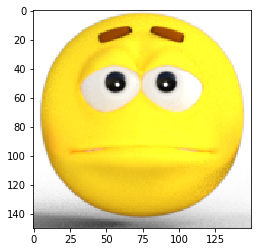

In [20]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

sad_dir=os.path.join(train_dir,str(os.listdir(train_dir)[0]))
img_path=os.listdir(sad_dir)[8]
full_img_path=os.path.join(sad_dir,img_path)
img=mpimg.imread(full_img_path)
plt.imshow(img)
img.shape


In [26]:
# GRADED FUNCTION: train_happy_sad_model
def train_happy_sad_model():
    # Please write your code only where you are indicated.
    # please do not remove # model fitting inline comments.

    DESIRED_ACCURACY = 0.999

    class myCallback(tf.keras.callbacks.Callback):
         # Your Code
        def on_epoch_end(self,epoch,logs={}):
            if(logs.get('acc')>DESIRED_ACCURACY):
                print("\nReached {} accuracy so cancelling training!".format(DESIRED_ACCURACY))
                self.model.stop_training=True

    callbacks = myCallback()
    
    # This Code Block should Define and Compile the Model. Please assume the images are 150 X 150 in your implementation.
    model = tf.keras.models.Sequential([
        # Your Code Here
        tf.keras.layers.Conv2D(16,(3,3),activation="relu",input_shape=(150,150,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        
        tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        
        tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512,activation='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid')
    ])

    from tensorflow.keras.optimizers import RMSprop

    model.compile(loss='binary_crossentropy',
                 optimizer=RMSprop(lr=0.001),
                 metrics=['accuracy'])
        

    # This code block should create an instance of an ImageDataGenerator called train_datagen 
    # And a train_generator by calling train_datagen.flow_from_directory

    from tensorflow.keras.preprocessing.image import ImageDataGenerator

    train_datagen = ImageDataGenerator(rescale=1/255)
    

    # Please use a target_size of 150 X 150.
    train_generator = train_datagen.flow_from_directory("/tmp/h-or-s",
                                                        target_size=(150,150),
                                                        batch_size=10,
                                                        class_mode='binary'
        # Your Code Here
                    
    )
    # Expected output: 'Found 80 images belonging to 2 classes'

    # This code block should call model.fit_generator and train for
    # a number of epochs.
    # model fitting
    history = model.fit_generator(train_generator,epochs=15,verbose=1,steps_per_epoch=8,callbacks=[callbacks])
          # Your Code Here)
    # model fitting
    return history.history['acc'][-1]

In [23]:
80/10

8.0

In [27]:
# The Expected output: "Reached 99.9% accuracy so cancelling training!""
train_happy_sad_model()

W1117 21:07:23.145252 140613271525184 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Found 80 images belonging to 2 classes.
Epoch 1/15
8/8 [==============================] - 5s 590ms/step - loss: 1.8087 - acc: 0.6375
Epoch 2/15
8/8 [==============================] - 0s 48ms/step - loss: 0.5439 - acc: 0.7125
Epoch 3/15
8/8 [==============================] - 0s 50ms/step - loss: 0.2419 - acc: 0.9000
Epoch 4/15
8/8 [==============================] - 0s 49ms/step - loss: 0.1540 - acc: 0.9250
Epoch 5/15
8/8 [==============================] - 0s 50ms/step - loss: 0.1298 - acc: 0.9625
Epoch 6/15
8/8 [==============================] - 0s 50ms/step - loss: 0.0487 - acc: 0.9875
Epoch 7/15
8/8 [==============================] - 0s 49ms/step - loss: 0.0653 - acc: 0.9875
Epoch 8/15
5/8 [=================>............] - ETA: 0s - loss: 0.0095 - acc: 1.0000
Reached 0.999 accuracy so cancelling training!
8/8 [==============================] - 0s 49ms/step - loss: 0.0170 - acc: 1.0000


1.0

In [4]:
# Now click the 'Submit Assignment' button above.
# Once that is complete, please run the following two cells to save your work and close the notebook

In [ ]:
%%javascript
<!-- Save the notebook -->
IPython.notebook.save_checkpoint();

In [ ]:
%%javascript
IPython.notebook.session.delete();
window.onbeforeunload = null
setTimeout(function() { window.close(); }, 1000);